In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import keras
from keras import models
from keras import layers

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense, Bidirectional, Dropout, Flatten
from keras.optimizers import Adam
from keras.layers import TimeDistributed


import timeit
from sklearn.utils import shuffle

In [0]:
from google.colab import files
#files.upload() 

In [0]:
ls

 blues.00006.au
 blues.00008.au
 classical.00000.au
 country.00000.au
 country.00007.au
'Derek_Clegg_-_10_-_A_Strong_Will_Is_Needed (1).mp3'
 Derek_Clegg_-_10_-_A_Strong_Will_Is_Needed.mp3
 disco.00000.au
 disco.00002.au
 hiphop.00000.au
 hiphop.00001.au
 hiphop.00002.au
 hiphop.00004.au
 model-bilstm.pkl
 model-BiLSTM.pkl
 model_keras2.onnx
 model-keras2.pkl
 model-keras.pkl
 model-lstm.pkl
 sample_data/
 songname.png
'songs (1).csv'
 songs.csv
'You_get_the_Blues_ID_1201 (1).mp3'
 You_get_the_Blues_ID_1201.mp3


In [0]:
data = pd.read_csv('songs.csv')
data = data.drop(['filename'],axis = 1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,flatness,poly,chroma_cqt,chroma_cens,...,mfcc18,mfcc19,mfcc20,tonnetz1,tonnetz2,tonnetz3,tonnetz4,tonnetz5,tonnetz6,label
0,0.257259,0.09198,1195.411640,1481.284259,2234.878153,0.058871,0.017725,1.086251,0.555419,0.268175,...,-1.337586,-3.719717,-4.353154,0.020575,0.016943,0.088439,-0.026695,0.012183,-0.005494,blues
1,0.412501,0.09198,2171.221742,1954.383785,4237.132712,0.132802,0.000642,0.594293,0.513369,0.267898,...,-0.271427,-3.696092,-0.504041,-0.002745,0.008571,-0.042509,0.057754,0.005468,0.017238,blues
2,0.379428,0.09198,2148.786199,2204.574064,4673.663406,0.098812,0.005946,1.750953,0.594625,0.274696,...,0.464257,-1.909089,-3.128308,-0.010565,0.000952,0.003099,0.026811,-0.004230,0.006860,blues
3,0.340983,0.09198,1529.835316,2038.617579,3548.820207,0.056044,0.005735,1.223702,0.509443,0.267173,...,0.293875,-0.287431,0.531573,-0.020591,0.000802,0.031767,-0.016651,0.005038,0.005216,blues
4,0.356588,0.09198,2068.371125,2033.930047,4231.499413,0.104372,0.002294,0.675315,0.503215,0.261366,...,0.194597,0.842872,-3.416576,0.007437,0.018288,0.046516,0.011819,0.007859,-0.007299,blues


In [0]:
data = shuffle(data)

In [0]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [0]:
X_train.shape

(900, 37)

In [0]:

x_train = X_train.reshape((900, 1, 37))

In [0]:
x_train.shape

(900, 1, 37)

In [0]:
y_train.shape

(900,)

In [0]:
ytrain = y_train.reshape((900, 1, ))

In [0]:
ytrain.shape

(900, 1)

In [0]:
#prevent overfitting: https://stats.stackexchange.com/questions/204745/preventing-overfitting-of-lstm-on-small-dataset
#https://www.researchgate.net/post/In_neural_networks_model_which_number_of_hidden_units_to_select
#https://pdfs.semanticscholar.org/064f/1e85984b207c1eb3c53ac8b68037089b7a0b.pdf
model = Sequential()
model.add(Bidirectional(LSTM(512, input_shape=(1,37), return_sequences=True)))
model.add(Dropout(0.5))
model.add(TimeDistributed(Dense(128, activation='sigmoid')))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(layers.Dense(32, activation='tanh'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
#model.summary()


In [0]:

history = model.fit(x_train, ytrain,
                    epochs=45,
                    batch_size=16,
                    validation_split=0.1)

Train on 810 samples, validate on 90 samples
Epoch 1/45
810/810 [==============================] - 6s 8ms/step - loss: 2.7766 - acc: 0.1086 - val_loss: 1.9483 - val_acc: 0.3667
Epoch 2/45
810/810 [==============================] - 4s 5ms/step - loss: 2.4223 - acc: 0.1617 - val_loss: 1.7502 - val_acc: 0.4000
Epoch 3/45
810/810 [==============================] - 4s 5ms/step - loss: 2.2403 - acc: 0.2407 - val_loss: 1.6667 - val_acc: 0.4222
Epoch 4/45
810/810 [==============================] - 4s 5ms/step - loss: 2.1278 - acc: 0.2469 - val_loss: 1.6218 - val_acc: 0.4111
Epoch 5/45
810/810 [==============================] - 4s 5ms/step - loss: 2.0315 - acc: 0.2568 - val_loss: 1.5839 - val_acc: 0.4333
Epoch 6/45
810/810 [==============================] - 4s 5ms/step - loss: 1.9630 - acc: 0.2741 - val_loss: 1.5548 - val_acc: 0.4778
Epoch 7/45
810/810 [==============================] - 4s 5ms/step - loss: 1.8886 - acc: 0.3136 - val_loss: 1.5026 - val_acc: 0.5222
Epoch 8/45
810/810 [===========

In [0]:
x_test = X_test.reshape((100,1,37))

In [0]:
ytest = y_test.reshape((100,1))

In [0]:
test_loss, test_acc = model.evaluate(x_test,ytest)
print('test_acc: ',test_acc)

100/100 [==============================] - 0s 463us/step
test_acc:  0.67


In [0]:
from matplotlib import pyplot

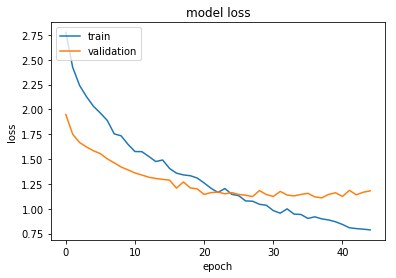

In [0]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper left')
pyplot.show()

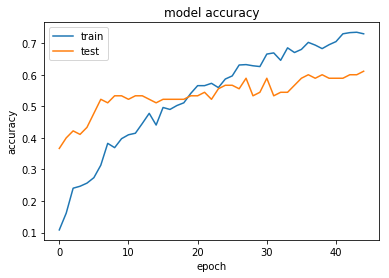

In [0]:
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [0]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(model, open("model-bilstm.pkl","wb"))


In [0]:
ls

 model-bilstm.pkl   sample_data/     songs.csv
 model-BiLSTM.pkl  'songs (1).csv'


In [0]:
files.download('model-bilstm.pkl')

Export as ONNX model

In [0]:
!pip install onnx

In [0]:
!pip install onnxmltools

In [0]:
import onnxmltools
from keras.models import load_model

In [0]:
onnx_model = onnxmltools.convert_keras(model)

Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
using tensorflow=1.13.1, onnx=1.5.0, opset=10, tfonnx=1.5.0/82f805


In [0]:
output_onnx_model = 'model_bilstm.onnx'
onnxmltools.utils.save_model(onnx_model, output_onnx_model)

In [0]:
files.download('model_bilstm.onnx')